In [57]:
library(igraph)
library(ggplot2)

In [58]:
fbData<-read.table("facebook_combined.txt",header=TRUE,sep=" ")
fbData<-as.matrix(fbData)
#print(fbData)
fbGraph = graph_from_edgelist(fbData+1, directed=FALSE)

In [59]:
vertex_id <-c()
vertext_id <-V(fbGraph)
V(fbGraph)$name = vertext_id
#V(fbGraph)$label

In [60]:
comm_struct <-c(1,108,349,484,1087)
#make personalized graph for the five core nodes
#pGraph = make_ego_graph(fbGraph,1,nodes=V(fbGraph)[comm_struct])
#pGraph = make_ego_graph(fbGraph,1,nodes=349)

In [61]:
count_distribution <- function(arr, distr, core_node) {
    arr <- sort(arr)
    df <- data.frame(value=c(NA), freq=c(NA))
    df <- df[-1, ]
    curValue <- arr[1]
    count <- 1
    for (i in 2:length(arr)) {
        if (arr[i] != curValue) {
            df[nrow(df)+1, ] <- c(curValue, count)
            curValue <- arr[i]
            count <- 1
        } else {
            count <- count + 1
        }
    }
    df[nrow(df)+1, ] <- c(curValue, count)
    return(df)
}

In [202]:
c_node = as.character(1)
pGraph = make_ego_graph(fbGraph,1,nodes=c_node)

#neighbors of the core node
ns<-neighbors(pGraph[[1]], c_node)
#print(as.numeric(V(pGraph[[1]])["349"]))
#pGraph[[1]].vs.find(name).n

for (n in ns) {
    
    deg <-degree(pGraph[[1]],n)
    neigh_n<-neighbors(pGraph[[1]], n)
    mutual_friend<-intersection(ns,neigh_n)
    
    #Embeddeness  = length 
    #cat("Degree :",deg, "Mutual Friend :",length(mutual_friend),"\n")
    
    #print(mutual_friend)
    #print(n)
    
    v_name  = V(pGraph[[1]])[n]$name
    delete_graph <- delete_vertices(pGraph[[1]], c(c_node,v_name))
    
    mutual_name <- V(pGraph[[1]])[mutual_friend]$name
    vtoids <- c()
    for (id in V(delete_graph)) {
        for (name in mutual_name) {
            if (V(delete_graph)[id]$name == name) {
                vtoids <- c(vtoids, id)
            }
        }
        
    }
    
    
    dist <- distances(delete_graph, v=vtoids, to=vtoids)
    dist[is.infinite(dist)] <- NA
    print(sum(dist, na.rm = TRUE)/2)
}


[1] 41
[1] 189
[1] 42
[1] 112
[1] 11
[1] 281
[1] 30
[1] 2518
[1] 44
[1] 0
[1] 0
[1] 597
[1] 118
[1] 0
[1] 40
[1] 87
[1] 0
[1] 77
[1] 124
[1] 3571
[1] 76
[1] 334
[1] 117
[1] 4504
[1] 3561
[1] 7
[1] 84
[1] 127
[1] 189
[1] 409
[1] 10
[1] 0
[1] 0
[1] 0
[1] 47
[1] 0
[1] 55
[1] 144
[1] 1652
[1] 416
[1] 0
[1] 0
[1] 10
[1] 73
[1] 6
[1] 0
[1] 365
[1] 0
[1] 70
[1] 18
[1] 0
[1] 768
[1] 25
[1] 143
[1] 4971
[1] 148
[1] 6
[1] 191
[1] 30
[1] 3
[1] 462
[1] 10
[1] 16
[1] 91
[1] 104
[1] 4659
[1] 34
[1] 52
[1] 0
[1] 1
[1] 365
[1] 47
[1] 0
[1] 100
[1] 1
[1] 18
[1] 28
[1] 59
[1] 374
[1] 0
[1] 876
[1] 18
[1] 120
[1] 110
[1] 10
[1] 94
[1] 293
[1] 30
[1] 0
[1] 30
[1] 203
[1] 25
[1] 298
[1] 12
[1] 62
[1] 2
[1] 1694
[1] 94
[1] 42
[1] 184
[1] 10
[1] 159
[1] 663
[1] 108
[1] 38
[1] 1
[1] 82
[1] 960
[1] 6
[1] 94
[1] 1
[1] 1106
[1] 0
[1] 250
[1] 168
[1] 18
[1] 908
[1] 3587
[1] 9
[1] 103
[1] 3170
[1] 183
[1] 10
[1] 5
[1] 15
[1] 137
[1] 511
[1] 17
[1] 199
[1] 15
[1] 189
[1] 141
[1] 203
[1] 36
[1] 360
[1] 178
[1] 0
[1]

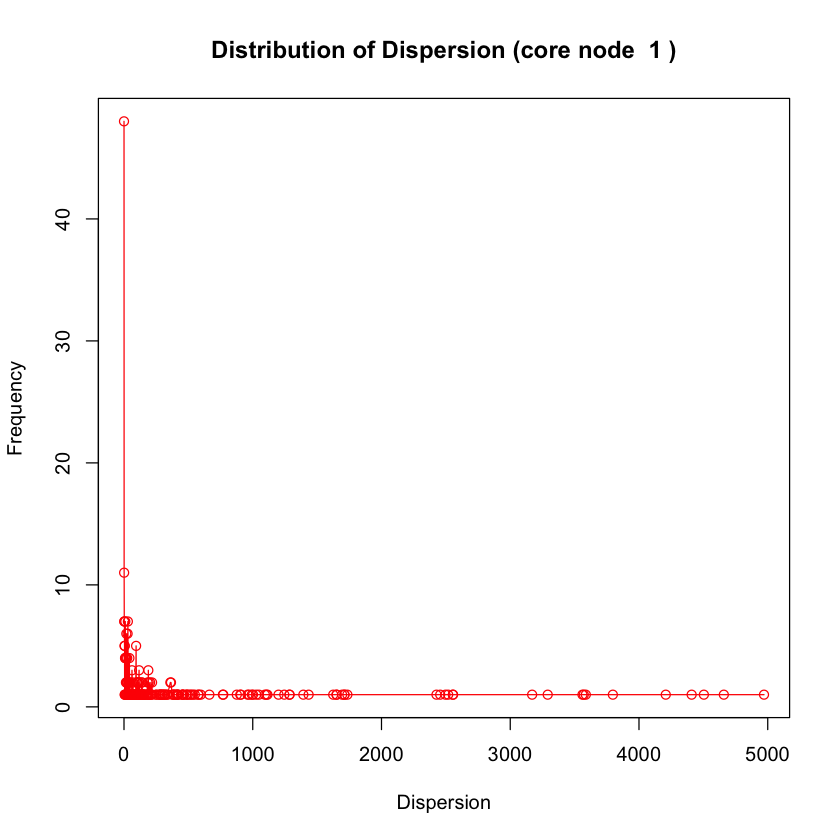

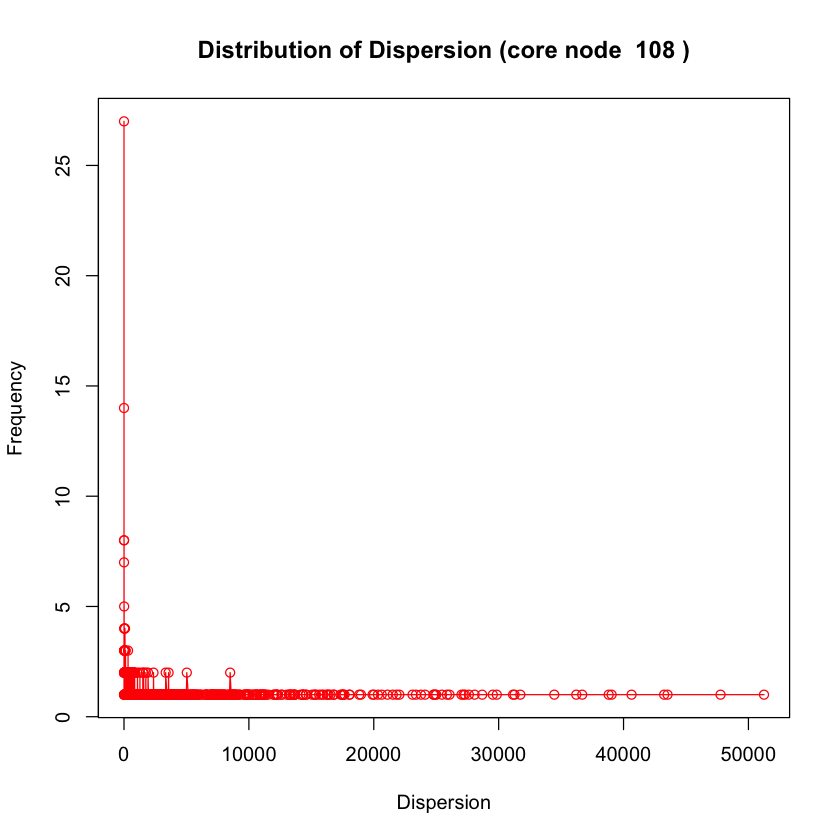

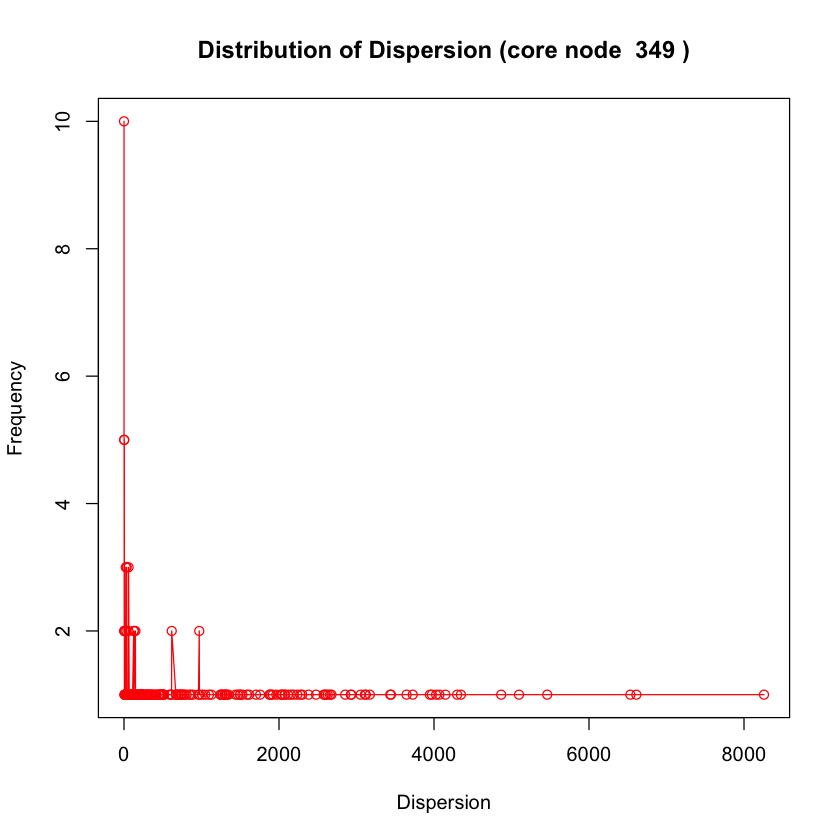

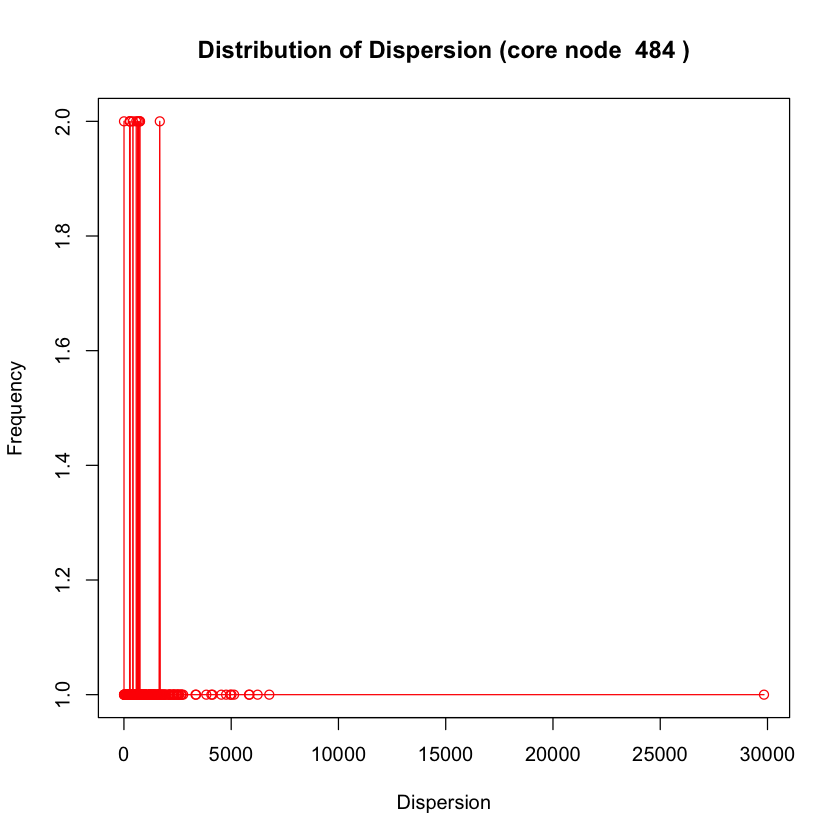

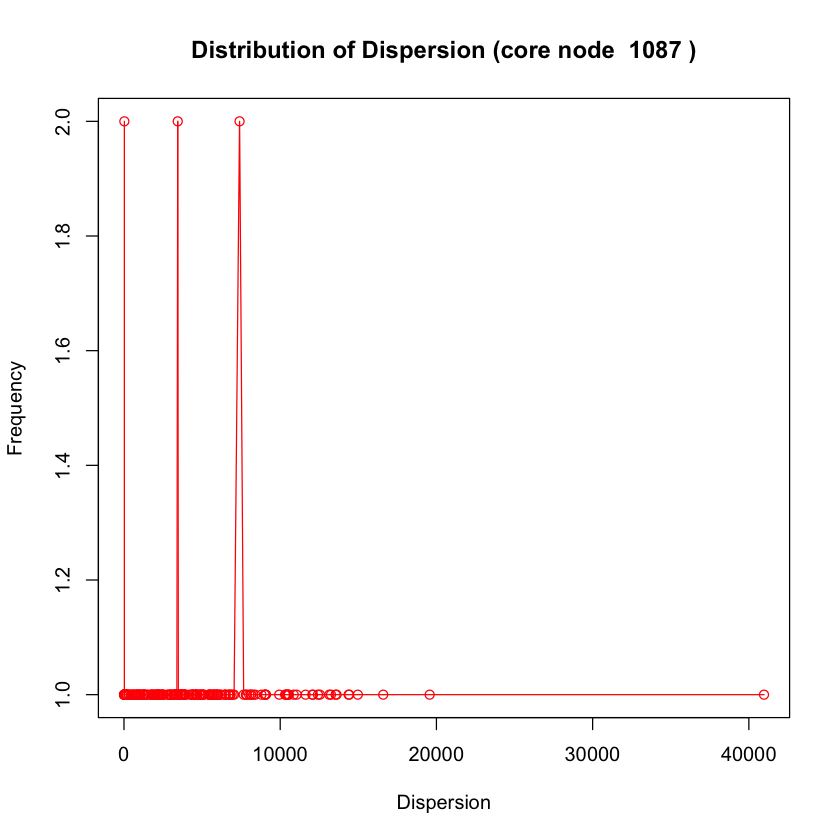

In [6]:
emb_list<-list()
comm_struct <-c(1,108,349,484,1087)
#comm_struct <-c(349)
for(i in comm_struct) {

    #personalized graph of core node
    c_node = as.character(i)
    pGraph = make_ego_graph(fbGraph,1,nodes=c_node)
    #neighbors of the core node
    ns<-neighbors(pGraph[[1]], c_node)
    
    emb <-c()
    disps<-c()
    #for each neighbor of the core node, get the neighbors of the neighbors
    for (n in ns) {
        
        neigh_n<-neighbors(pGraph[[1]], n)
        mutual_friend<-intersection(ns,neigh_n)
        #embeddness = length(mutual_friend)
        emb <-c(emb,length(mutual_friend))
        
        # Calculate disperstion
        # modify the graph first to remove node and the target neighbor
        delete_graph <- delete_vertices(pGraph[[1]], c(c_node, V(pGraph[[1]])[n]$name))
        
        mutual_name <- V(pGraph[[1]])[mutual_friend]$name
        vtoids <- c()
        for (id in V(delete_graph)) {
            for (name in mutual_name) {
                if (V(delete_graph)[id]$name == name) {
                    vtoids <- c(vtoids, id)
                }
            }
        }
        dist <- distances(delete_graph, v=vtoids, to=vtoids)
        dist[is.infinite(dist)] <- NA
        cur_disp = sum(dist, na.rm = TRUE)/2
        disps <- c(disps, cur_disp)
    }
    disps_df <- count_distribution(disps)
    plot(disps_df, type="o", col="red", main=paste("Distribution of Dispersion (core node ",c_node,")",collapse=""),
         xlab="Dispersion",ylab="Frequency")
    
    embeds_df <- count_distribution(emb)
    emb_list[[length(emb_list)+1]] <- embeds_df
}


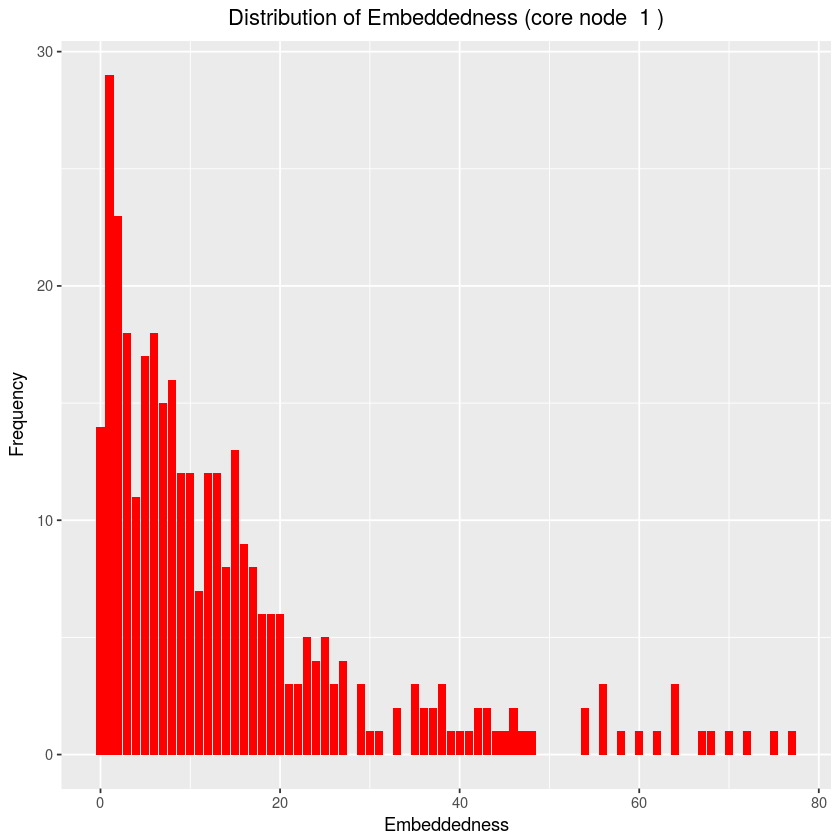

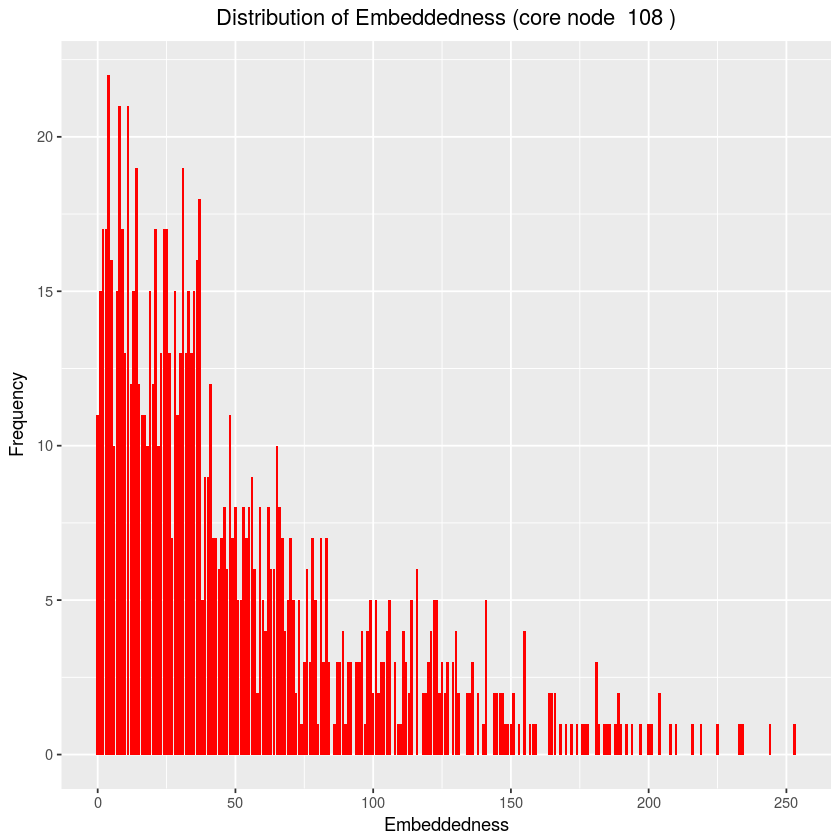

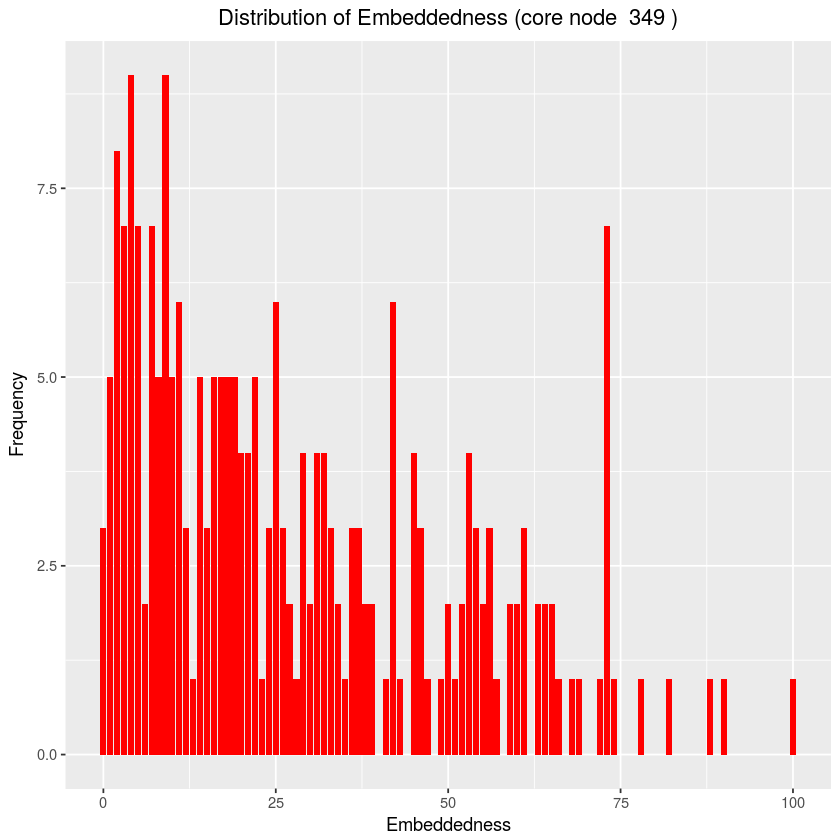

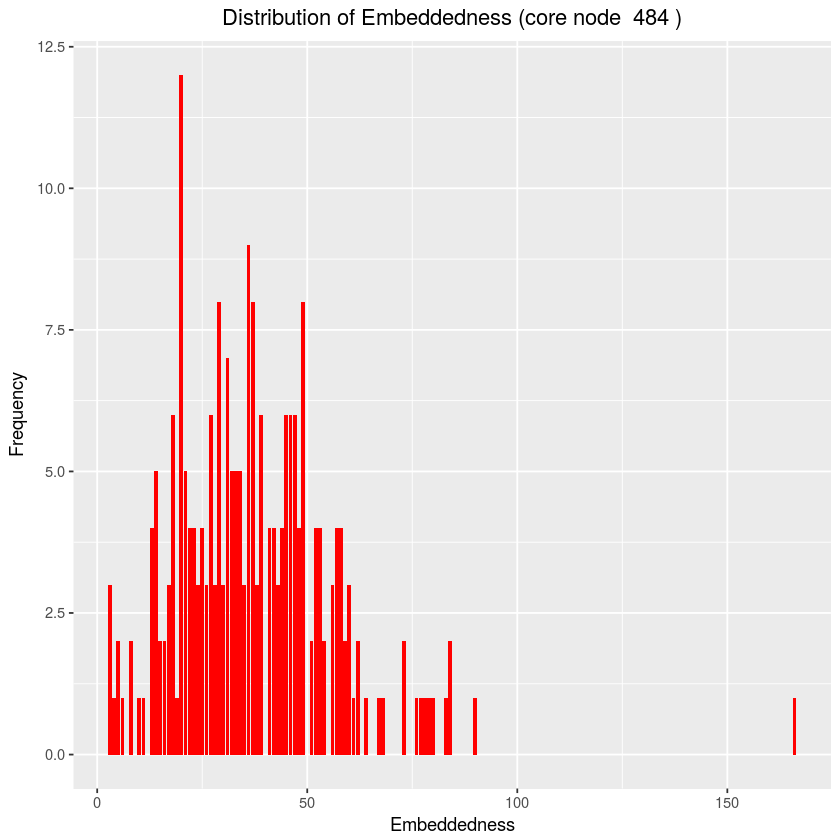

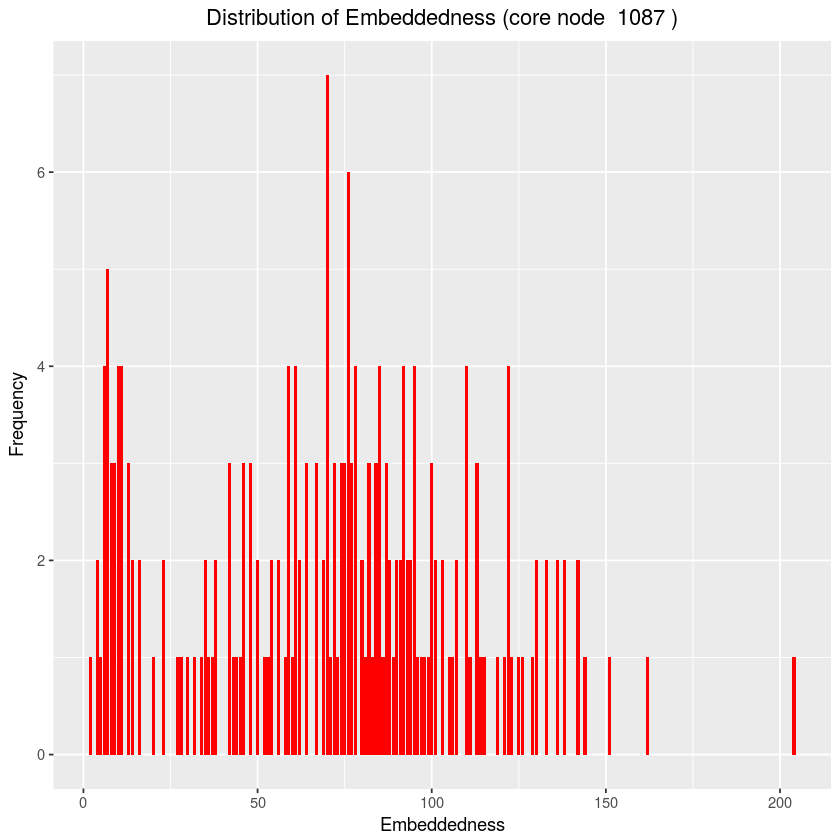

In [158]:
ggplot(emb_list[[1]], aes(x=value, y=freq))+ 
geom_bar(stat = "identity", fill="red")+
labs(title=paste("Distribution of Embeddedness (core node ",comm_struct[1],")",collapse=""), x="Embeddedness", y="Frequency")+
theme(plot.title = element_text(hjust = 0.5))

ggplot(emb_list[[2]], aes(x=value, y=freq))+ 
geom_bar(stat = "identity", fill="red")+
labs(title=paste("Distribution of Embeddedness (core node ",comm_struct[2],")",collapse=""), x="Embeddedness", y="Frequency")+
theme(plot.title = element_text(hjust = 0.5))

ggplot(emb_list[[3]], aes(x=value, y=freq))+ 
geom_bar(stat = "identity", fill="red")+
labs(title=paste("Distribution of Embeddedness (core node ",comm_struct[3],")",collapse=""), x="Embeddedness", y="Frequency")+
theme(plot.title = element_text(hjust = 0.5))

ggplot(emb_list[[4]], aes(x=value, y=freq))+ 
geom_bar(stat = "identity", fill="red")+
labs(title=paste("Distribution of Embeddedness (core node ",comm_struct[4],")",collapse=""), x="Embeddedness", y="Frequency")+
theme(plot.title = element_text(hjust = 0.5))

ggplot(emb_list[[5]], aes(x=value, y=freq))+ 
geom_bar(stat = "identity", fill="red")+
labs(title=paste("Distribution of Embeddedness (core node ",comm_struct[5],")",collapse=""), x="Embeddedness", y="Frequency")+
theme(plot.title = element_text(hjust = 0.5))

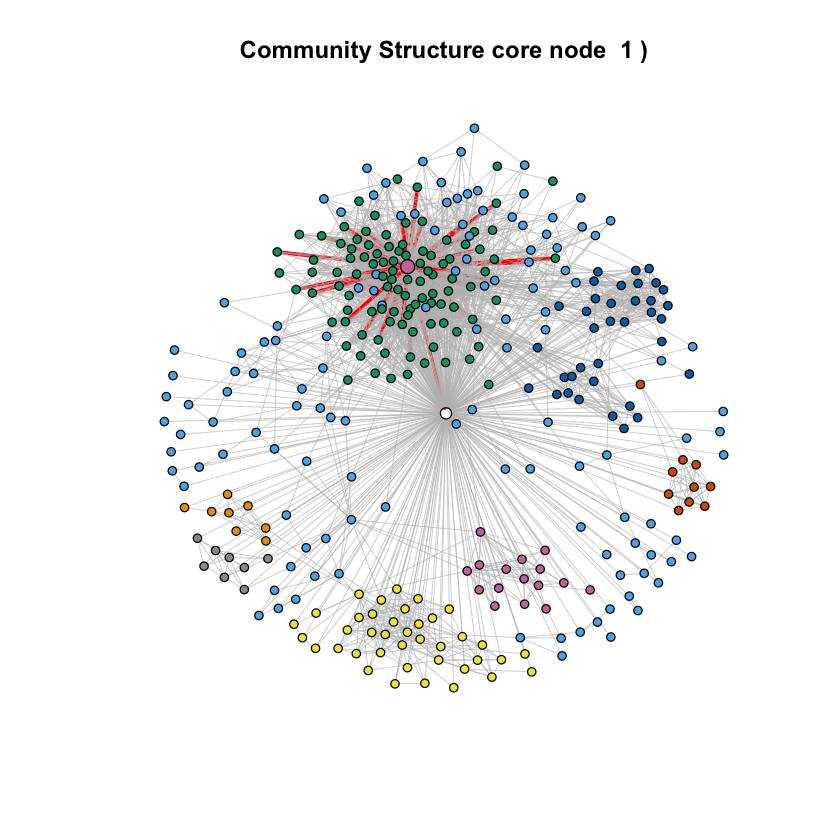

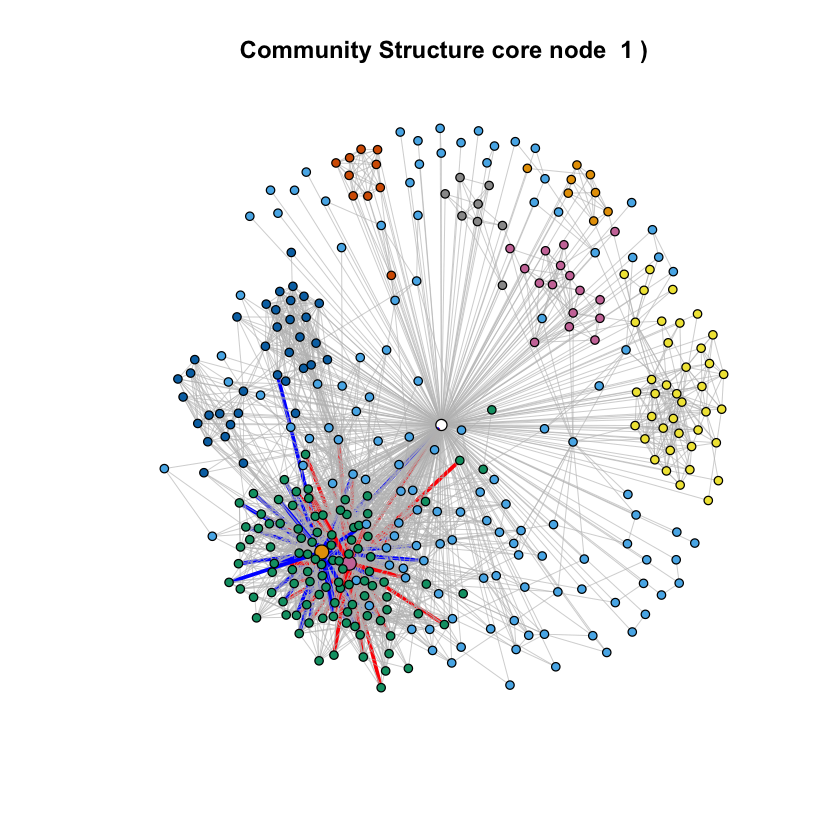

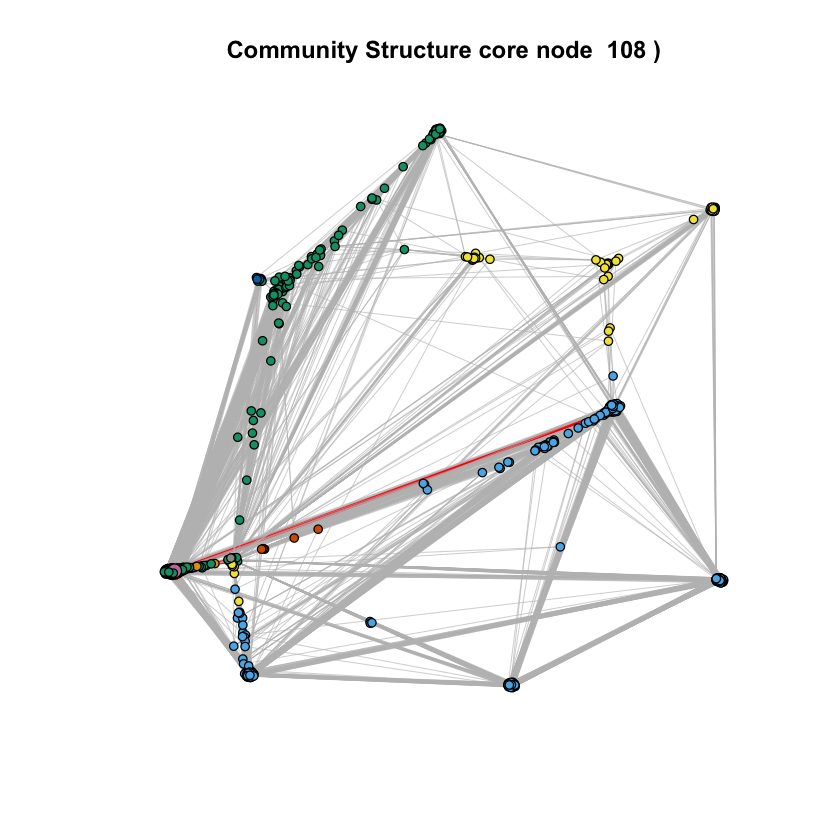

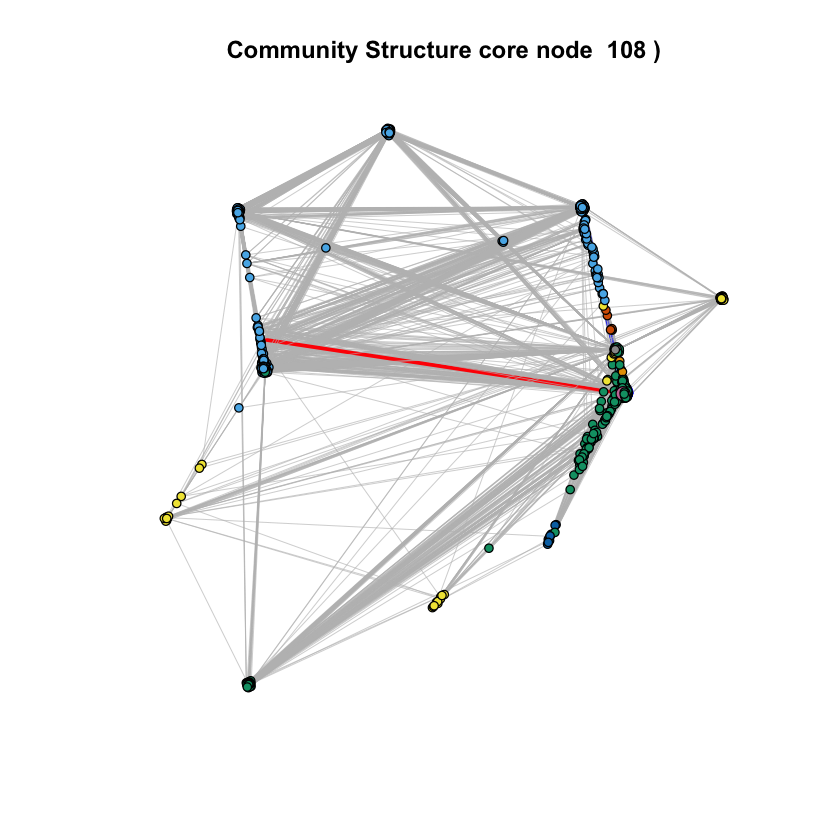

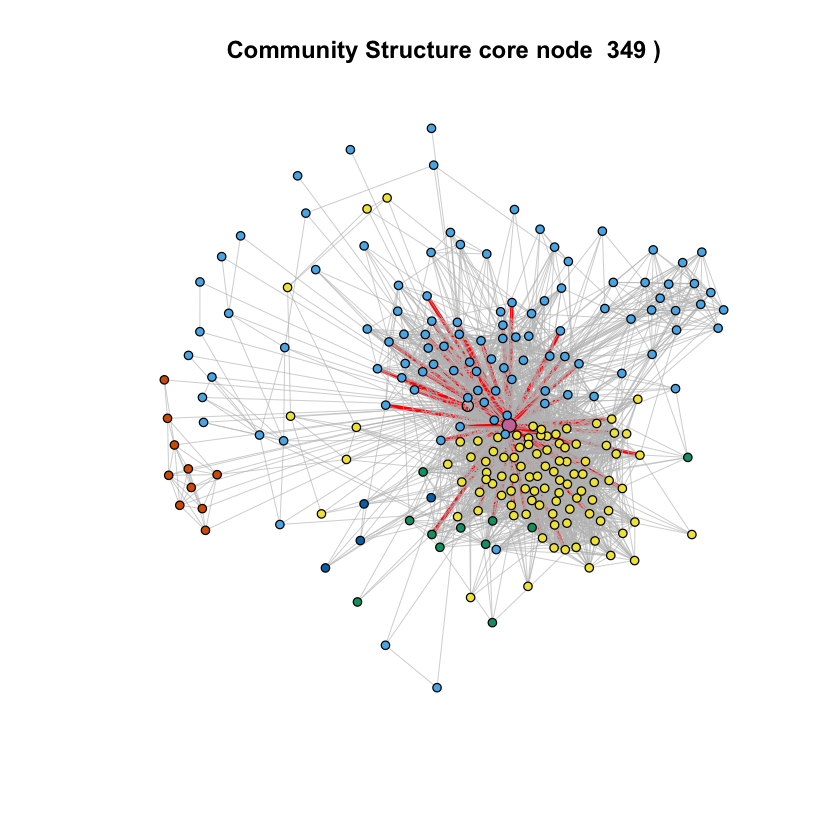

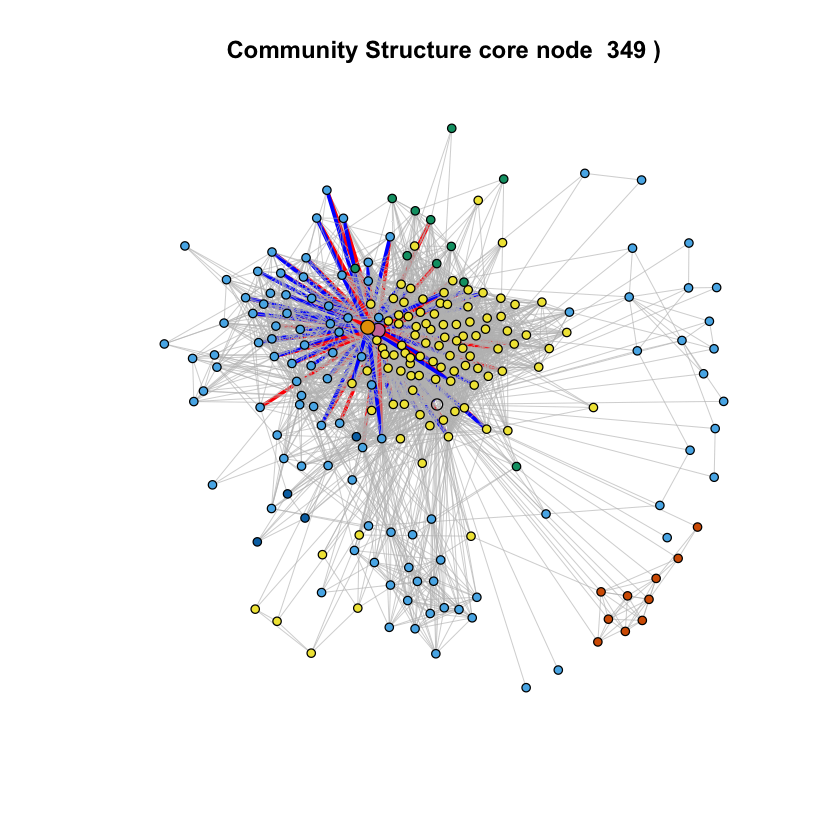

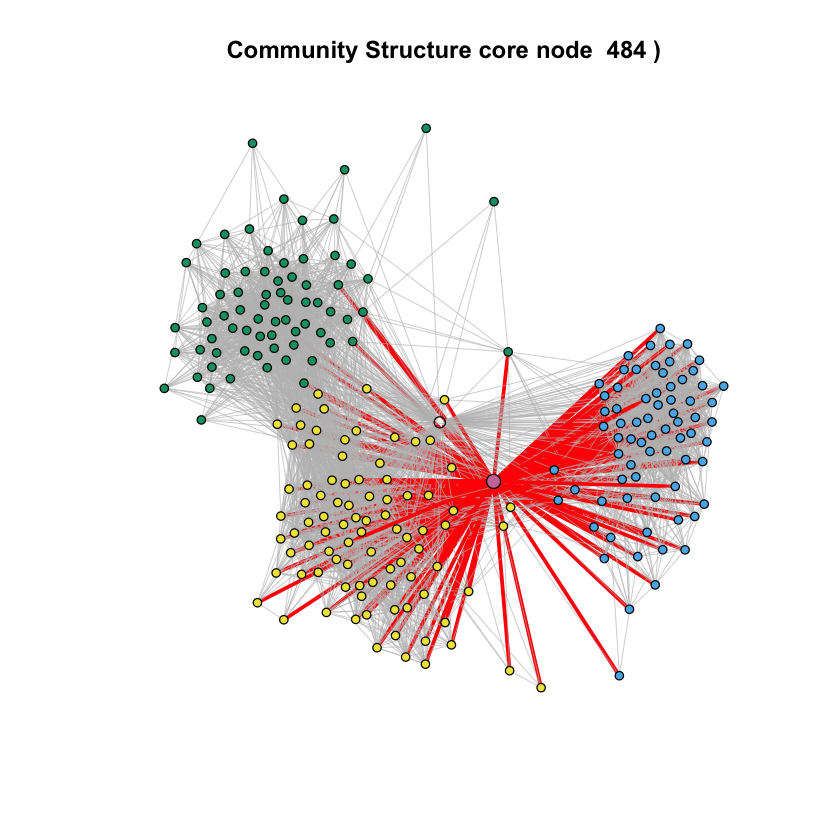

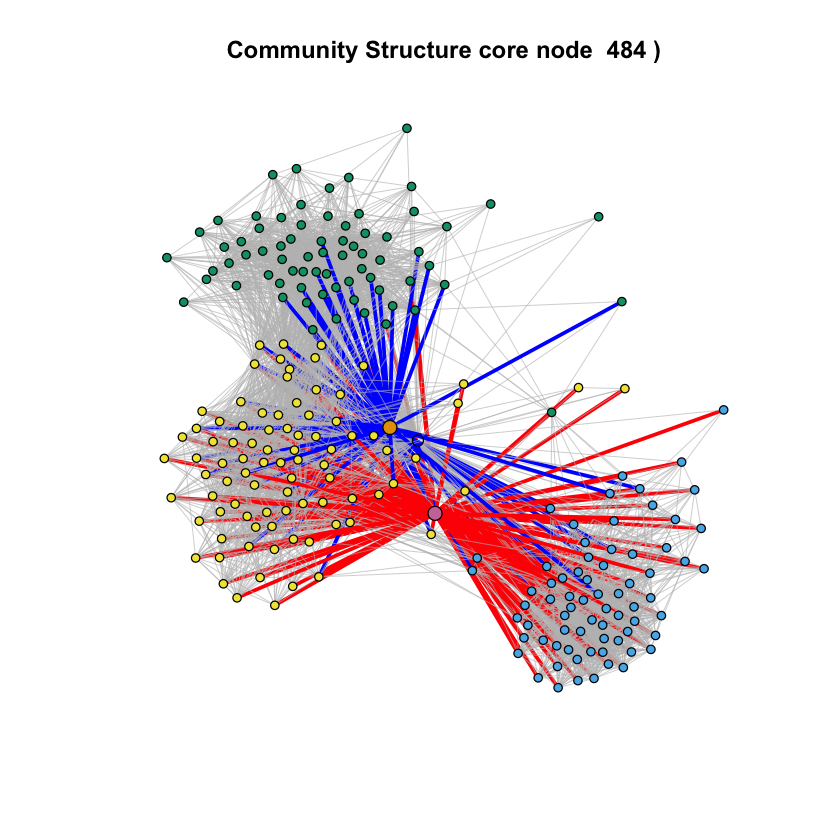

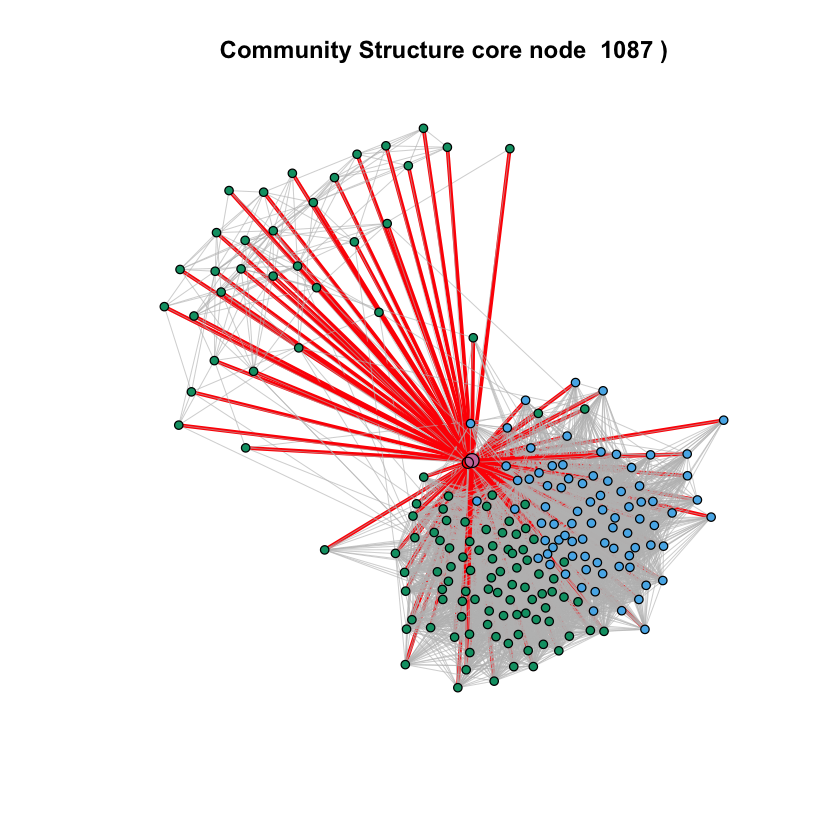

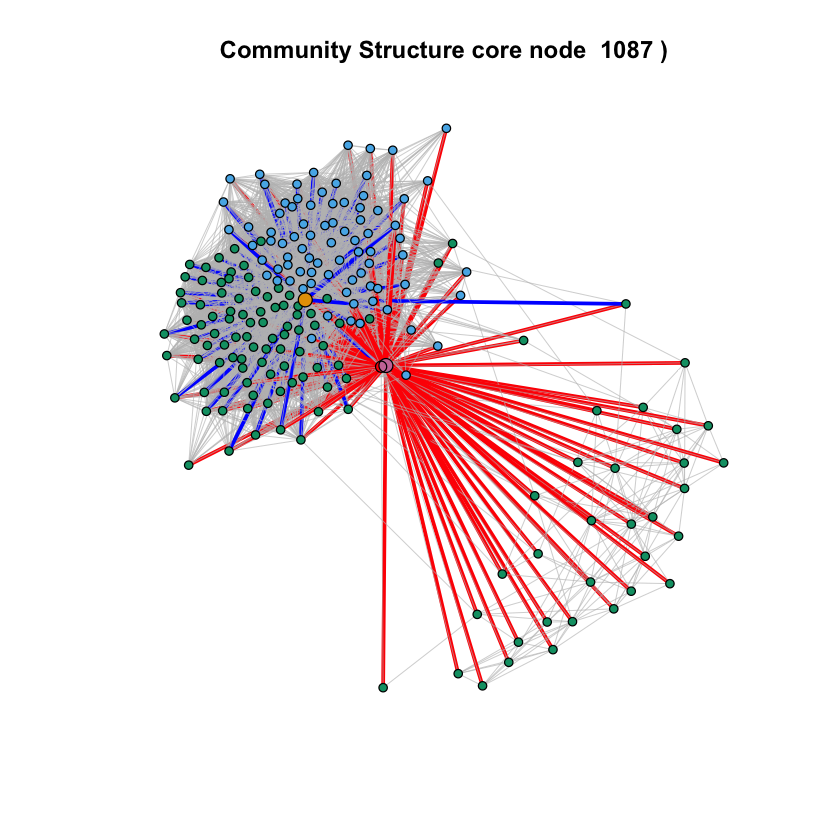

In [62]:
emb_list<-list()
comm_struct <-c(1,108,349,484,1087)
#comm_struct <-c(349)

for(i in comm_struct) {
    

    #personalized graph of core node
    c_node = as.character(i)
    pGraph = make_ego_graph(fbGraph,1,nodes=c_node)
    #neighbors of the core node
    ns<-neighbors(pGraph[[1]], c_node)
    
    emb <-c()
    disps<-c()
    #for each neighbor of the core node, get the neighbors of the neighbors
    
    max_disp_node = 0
    max_emb_node = 0
    max_disp = 0
    max_emb = 0
    max_ratio = 0
    max_ratio_node = 0
    
    for (n in ns) {
        
        neigh_n<-neighbors(pGraph[[1]], n)
        mutual_friend<-intersection(ns,neigh_n)
        #embeddness = length(mutual_friend)
        emb = length(mutual_friend)
        
        if(emb>max_emb) {
            max_emb = emb
            max_emb_node = n
        }
        
        # Calculate disperstion
        # modify the graph first to remove node and the target neighbor
        delete_graph <- delete_vertices(pGraph[[1]], c(c_node, V(pGraph[[1]])[n]$name))
        
        mutual_name <- V(pGraph[[1]])[mutual_friend]$name
        vtoids <- c()
        for (id in V(delete_graph)) {
            for (name in mutual_name) {
                if (V(delete_graph)[id]$name == name) {
                    vtoids <- c(vtoids, id)
                }
            }
        }
        dist <- distances(delete_graph, v=vtoids, to=vtoids)
        dist[is.infinite(dist)] <- NA
        cur_disp = sum(dist, na.rm = TRUE)/2
        disps <- c(disps, cur_disp)
        
        if(cur_disp > max_disp) {
            max_disp = cur_disp
            max_disp_node = n
        }
        
        if(emb > 0) {
            cur_ratio = cur_disp/emb
            if(cur_ratio > max_ratio) {
                max_ratio_node = n
                max_ratio = n
            }
        }
        
    }
    
    #Question 13
    core_node <- which(V(pGraph[[1]])$name == c_node)
    personal_community = fastgreedy.community(pGraph[[1]])

    node_color = personal_community$membership + 1
    node_size = rep(3,length(node_color))
    
    edge_color = rep("gray", length(E(pGraph[[1]])))
    edge_weight = rep(0.5, length(E(pGraph[[1]])))
    
    edge_color[which(get.edgelist(pGraph[[1]], name = FALSE)[,1] == max_disp_node | 
                 get.edgelist(pGraph[[1]], name = FALSE)[,2] == max_disp_node)] = "red";
    edge_weight[which(get.edgelist(pGraph[[1]], name = FALSE)[,1] == max_disp_node |  
                  get.edgelist(pGraph[[1]], name = FALSE)[,2] == max_disp_node)] = 3;
    
    node_size[max_disp_node] = 5
    node_color[max_disp_node] = 7
    node_size[core_node] = 4
    node_color[core_node] = 0
    plot.igraph(pGraph[[1]], vertex.size = node_size, vertex.label = NA, 
                edge.width = edge_weight, edge.color = edge_color, vertex.color = node_color, 
               main = paste("Community Structure core node ",c_node,")", collapse=""))
    
    
    
    #Question 14
    
    
    node_color_b = personal_community$membership + 1
    node_size_b = rep(3,length(node_color_b))
    
    edge_color_b = rep("gray", length(E(pGraph[[1]])))
    edge_weight_b = rep(0.5, length(E(pGraph[[1]])))
    
    #highlight 
    edge_color_b[which(get.edgelist(pGraph[[1]], name = FALSE)[,1] == max_emb_node | 
                 get.edgelist(pGraph[[1]], name = FALSE)[,2] == max_emb_node)] = "red";
    edge_weight_b[which(get.edgelist(pGraph[[1]], name = FALSE)[,1] == max_emb_node |  
                  get.edgelist(pGraph[[1]], name = FALSE)[,2] == max_emb_node)] = 3;
    
    edge_color_b[which(get.edgelist(pGraph[[1]], name = FALSE)[,1] == max_ratio_node | 
                 get.edgelist(pGraph[[1]], name = FALSE)[,2] == max_ratio_node)] = "blue";
    edge_weight_b[which(get.edgelist(pGraph[[1]], name = FALSE)[,1] == max_ratio_node |  
                  get.edgelist(pGraph[[1]], name = FALSE)[,2] == max_ratio_node)] = 3;
    
    
    node_size_b[max_emb_node] = 5
    node_color_b[max_emb_node] = 7
    node_size_b[max_ratio_node] = 5
    node_color_b[max_ratio_node] = 9
    node_size_b[core_node] = 4
    node_color_b[core_node] = 0
    
    plot.igraph(pGraph[[1]], vertex.size = node_size_b, vertex.label = NA, 
                edge.width = edge_weight_b, edge.color = edge_color_b, vertex.color = node_color_b, 
               main = paste("Community Structure core node ",c_node,")", collapse=""))
    
    
}

